# Credicard Detection Fraud

This notebook contains the source code for training and obtaining a valid model to predict fraudulent transactions. 

About the data, this can be downloaded from [kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data): The dataset contains transactions made by credit cards in September 2013 by European cardholders.

According with Kaggle this dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. 

The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.utils import plotVars


from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'sklearn'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from joblib import dump, load

ModuleNotFoundError: No module named 'seaborn'

In [3]:
df = pd.read_csv("data/creditcard.csv")
df.sample(1).T

,236097
Time,148669.000000
V1,1.814514
V2,-0.716347
V3,-0.024670
V4,0.362908
V5,-0.511228
V6,1.064234
V7,-1.150842
V8,0.550377
V9,1.800128


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**time** it´s not a useful variable to our study

In [5]:
df = df.loc[:, df.columns != 'Time']
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


# Exploratory data analysis

This section presents a brief exploratory analysis of the variables in the data set.

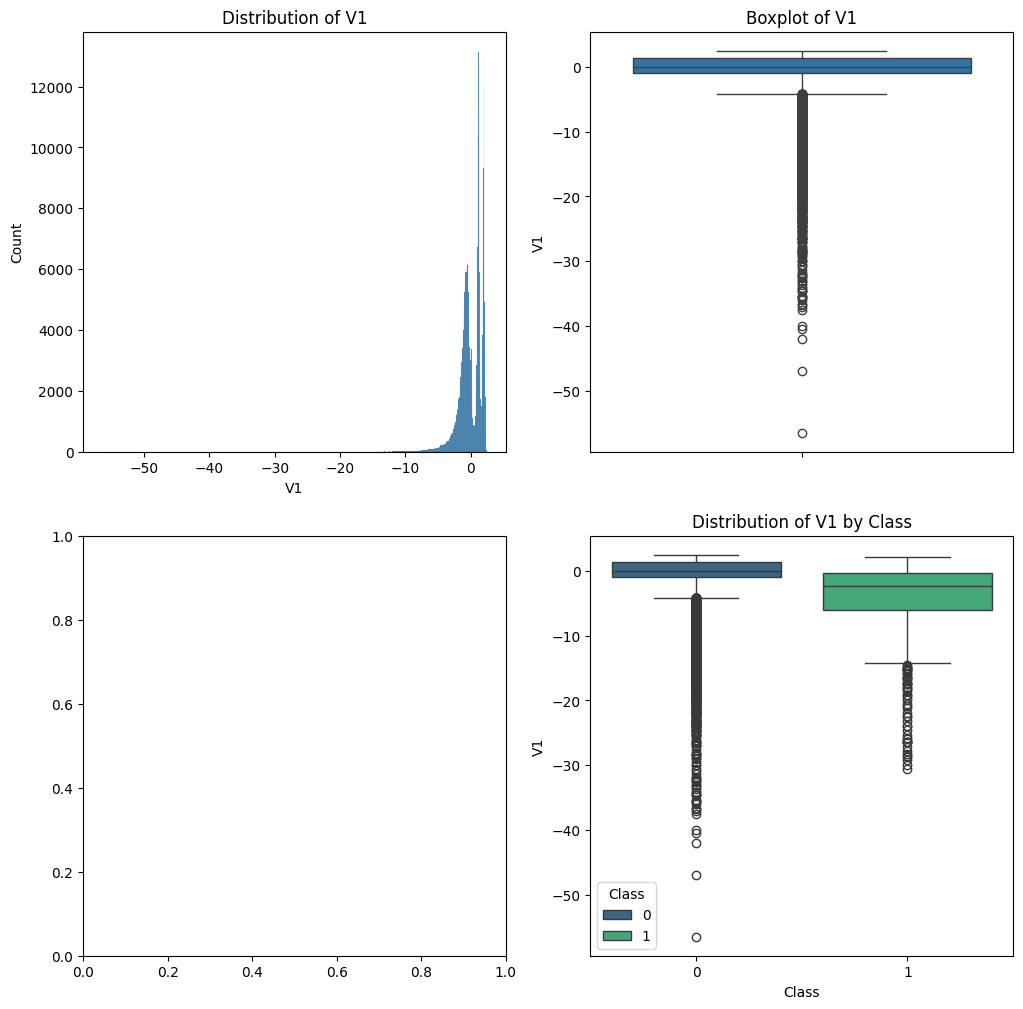

--------------------------
Class                 0           1
V1 count  284315.000000  492.000000
   mean        0.008258   -4.771948
   std         1.929814    6.783687
   min       -56.407510  -30.552380
   25%        -0.917544   -6.036063
   50%         0.020023   -2.342497
   75%         1.316218   -0.419200
   max         2.454930    2.132386


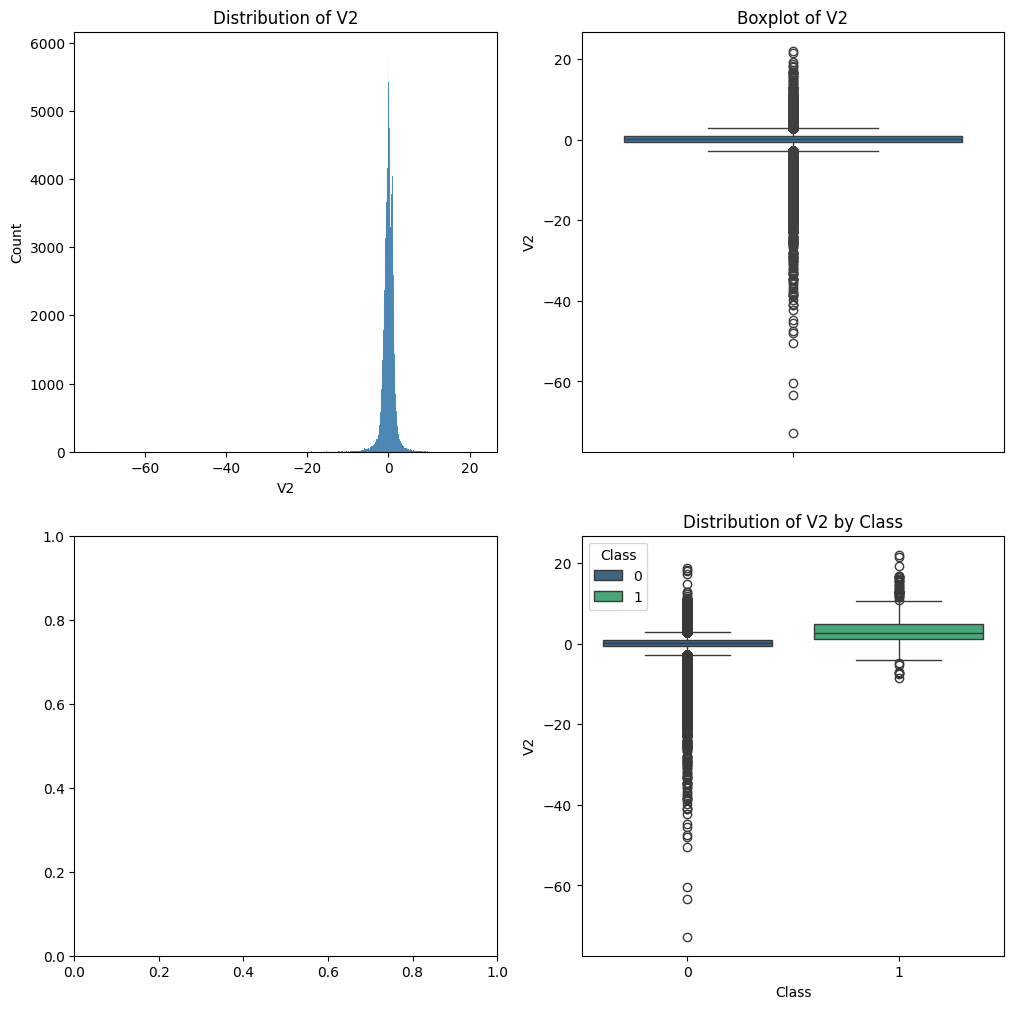

--------------------------
Class                 0           1
V2 count  284315.000000  492.000000
   mean       -0.006271    3.623778
   std         1.636146    4.291216
   min       -72.715728   -8.402154
   25%        -0.599473    1.188226
   50%         0.064070    2.717869
   75%         0.800446    4.971257
   max        18.902453   22.057729


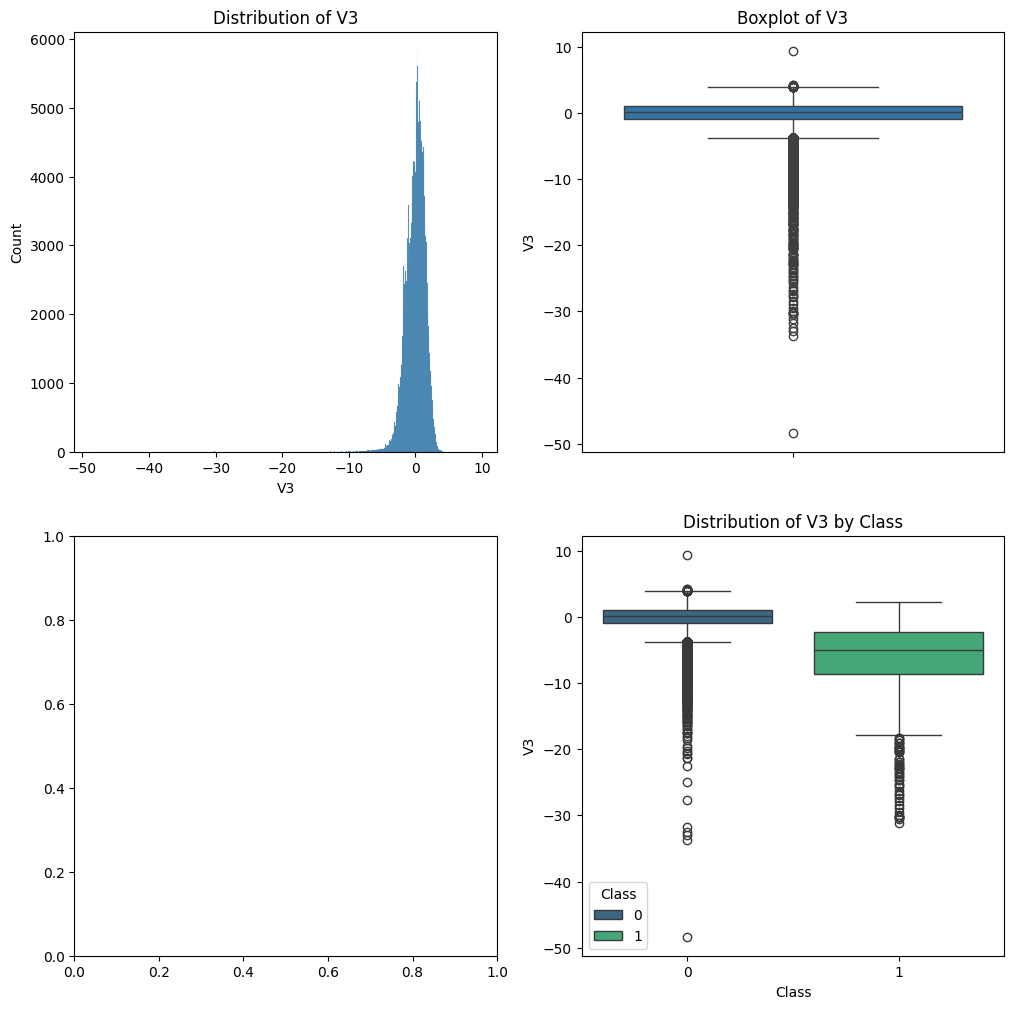

--------------------------
Class                 0           1
V3 count  284315.000000  492.000000
   mean        0.012171   -7.033281
   std         1.459429    7.110937
   min       -48.325589  -31.103685
   25%        -0.884541   -8.643489
   50%         0.182158   -5.075257
   75%         1.028372   -2.276185
   max         9.382558    2.250210


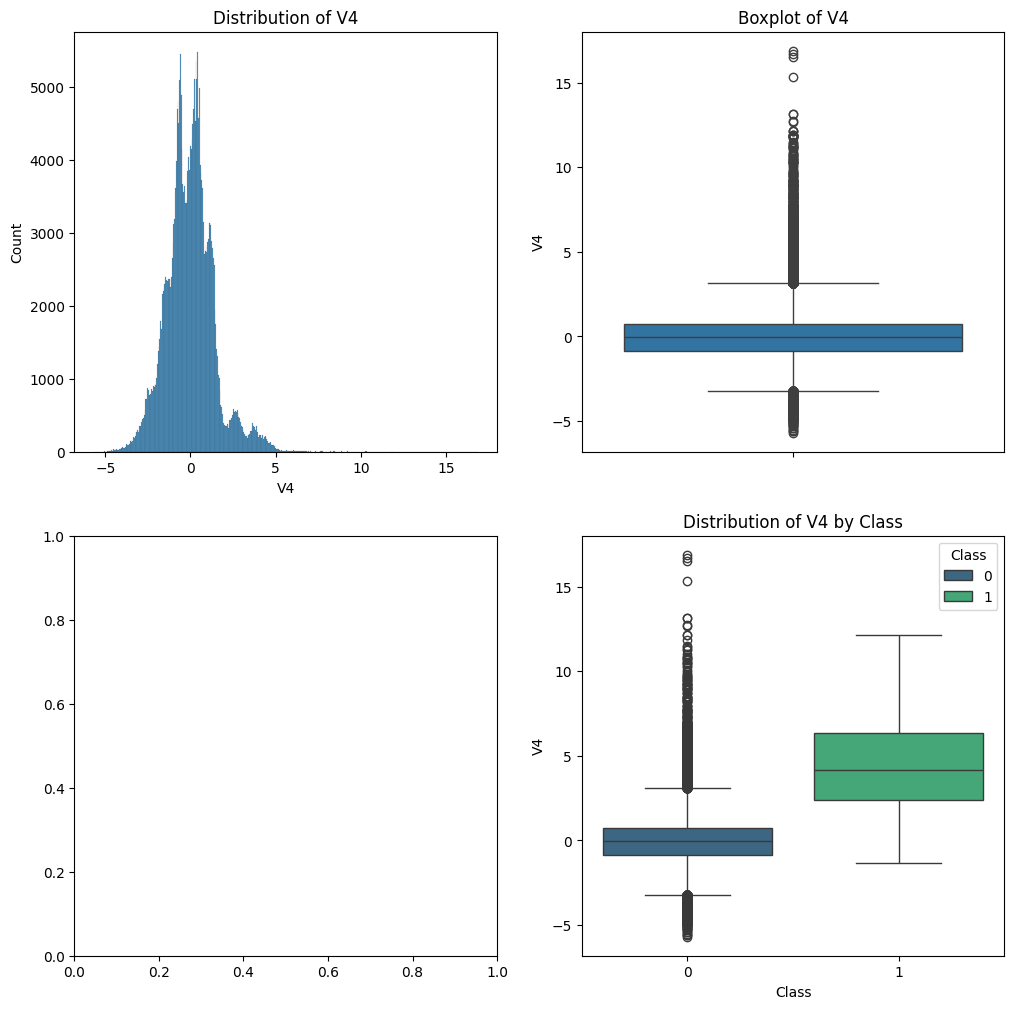

--------------------------
Class                 0           1
V4 count  284315.000000  492.000000
   mean       -0.007860    4.542029
   std         1.399333    2.873318
   min        -5.683171   -1.313275
   25%        -0.850077    2.373050
   50%        -0.022405    4.177147
   75%         0.737624    6.348729
   max        16.875344   12.114672


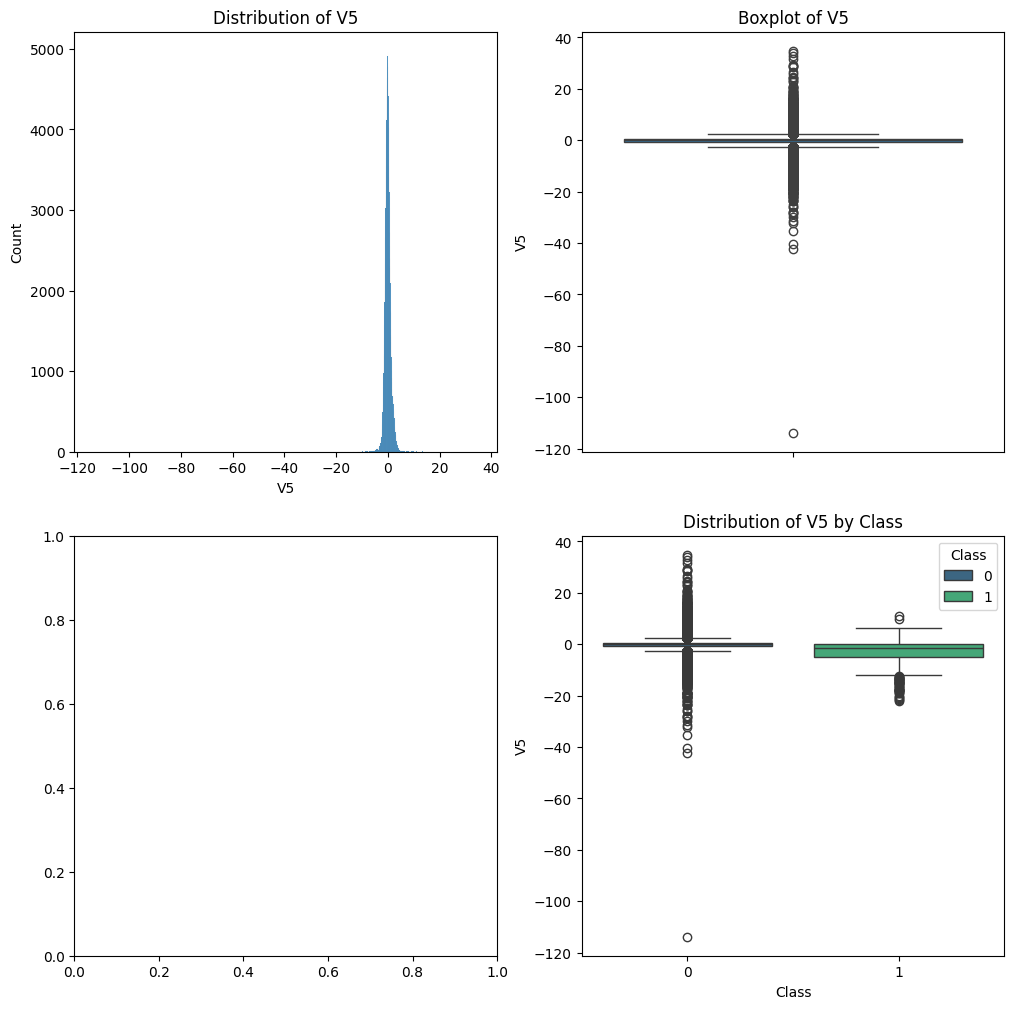

--------------------------
Class                 0           1
V5 count  284315.000000  492.000000
   mean        0.005453   -3.151225
   std         1.356952    5.372468
   min      -113.743307  -22.105532
   25%        -0.689398   -4.792835
   50%        -0.053457   -1.522962
   75%         0.612181    0.214562
   max        34.801666   11.095089


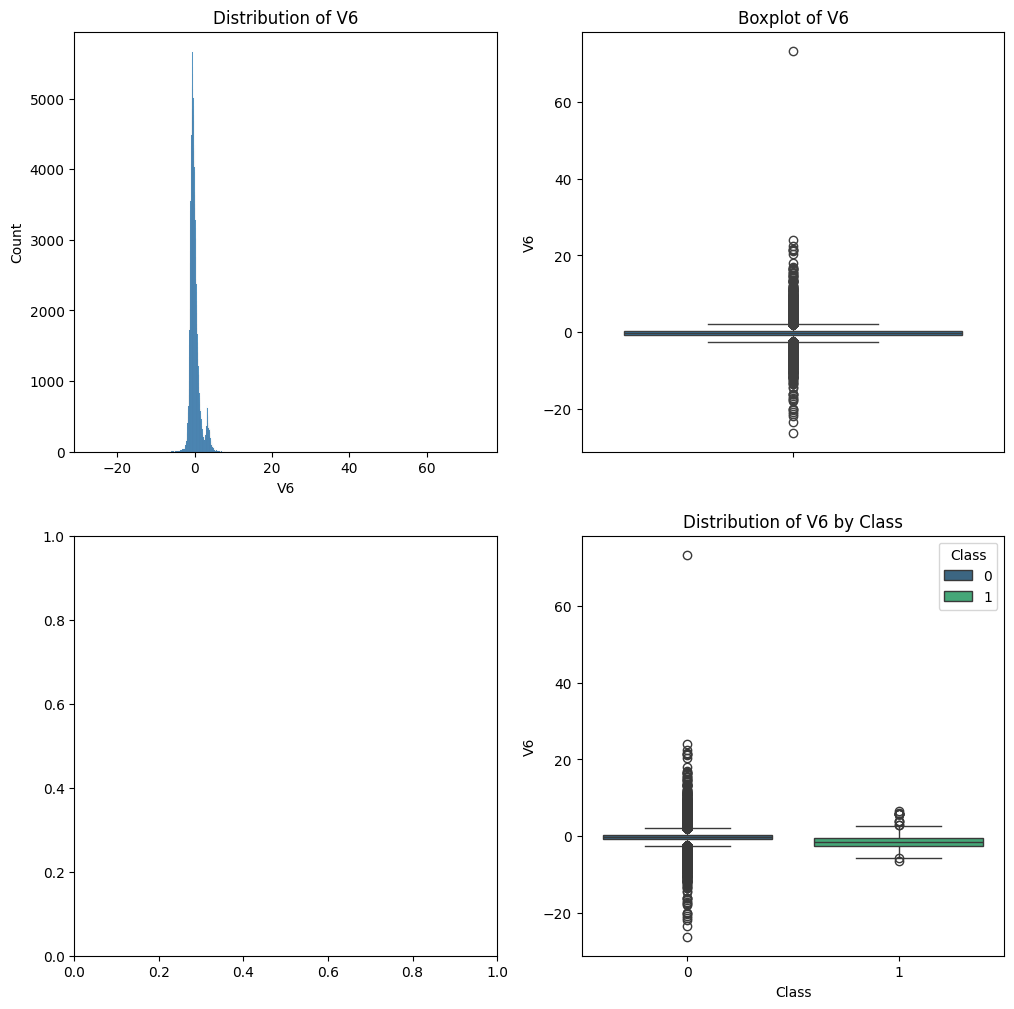

--------------------------
Class                 0           1
V6 count  284315.000000  492.000000
   mean        0.002419   -1.397737
   std         1.329913    1.858124
   min       -26.160506   -6.406267
   25%        -0.766847   -2.501511
   50%        -0.273123   -1.424616
   75%         0.399619   -0.413216
   max        73.301626    6.474115


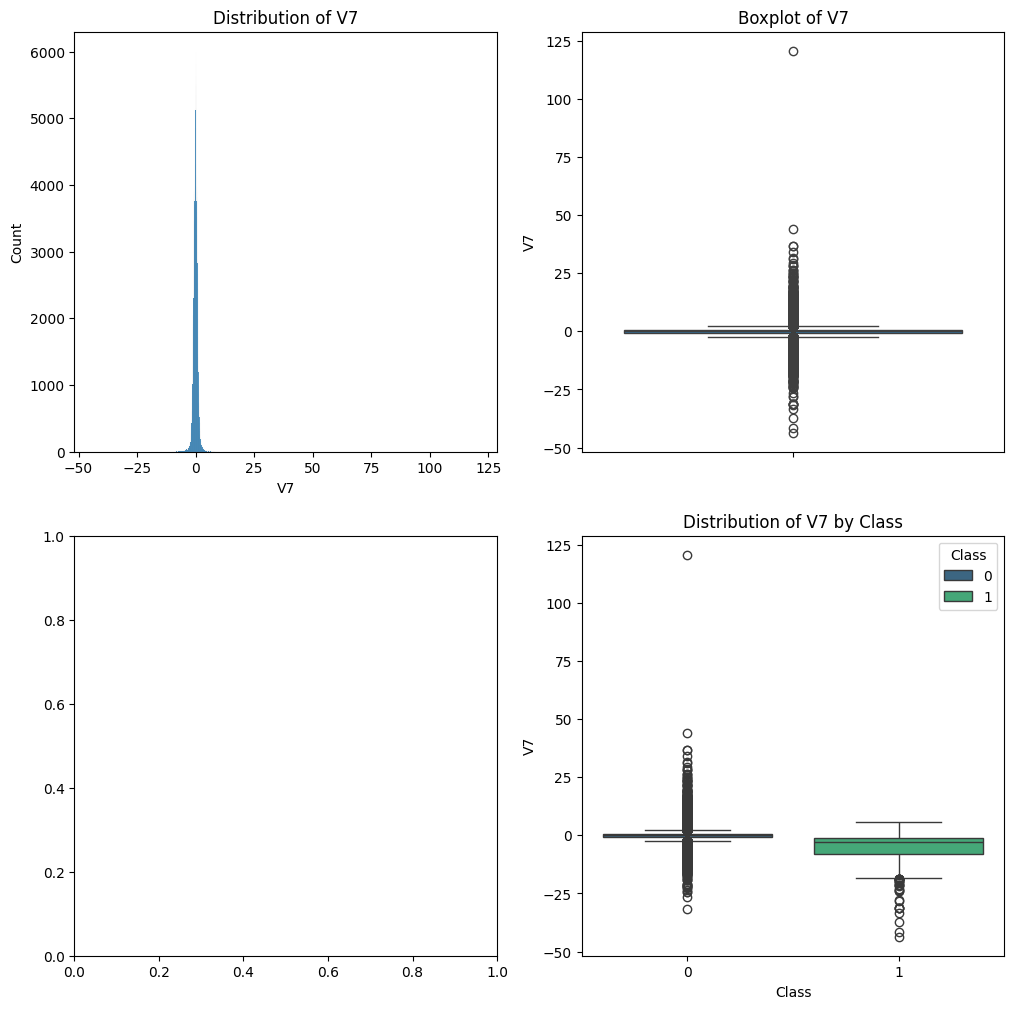

--------------------------
Class                 0           1
V7 count  284315.000000  492.000000
   mean        0.009637   -5.568731
   std         1.178812    7.206773
   min       -31.764946  -43.557242
   25%        -0.551442   -7.965295
   50%         0.041138   -3.034402
   75%         0.571019   -0.945954
   max       120.589494    5.802537


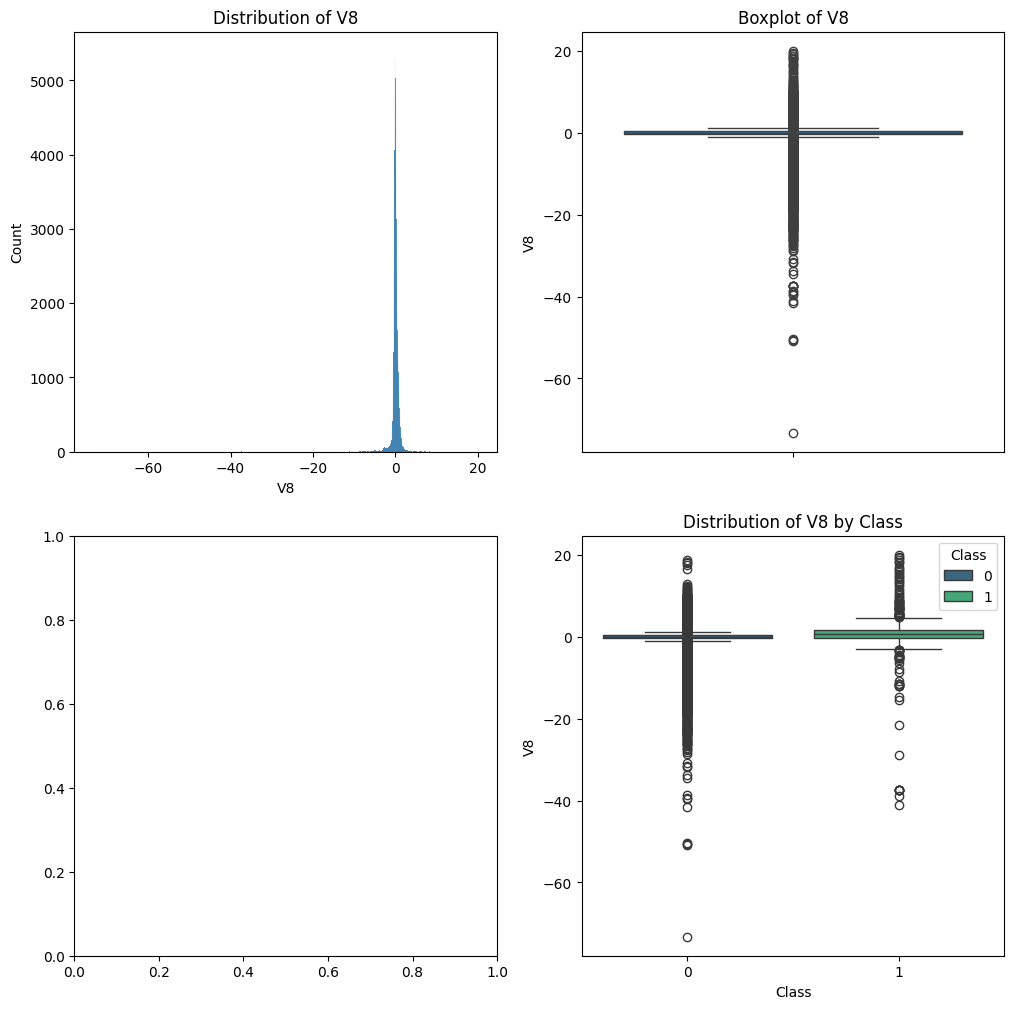

--------------------------
Class                 0           1
V8 count  284315.000000  492.000000
   mean       -0.000987    0.570636
   std         1.161283    6.797831
   min       -73.216718  -41.044261
   25%        -0.208633   -0.195336
   50%         0.022041    0.621508
   75%         0.326200    1.764879
   max        18.709255   20.007208


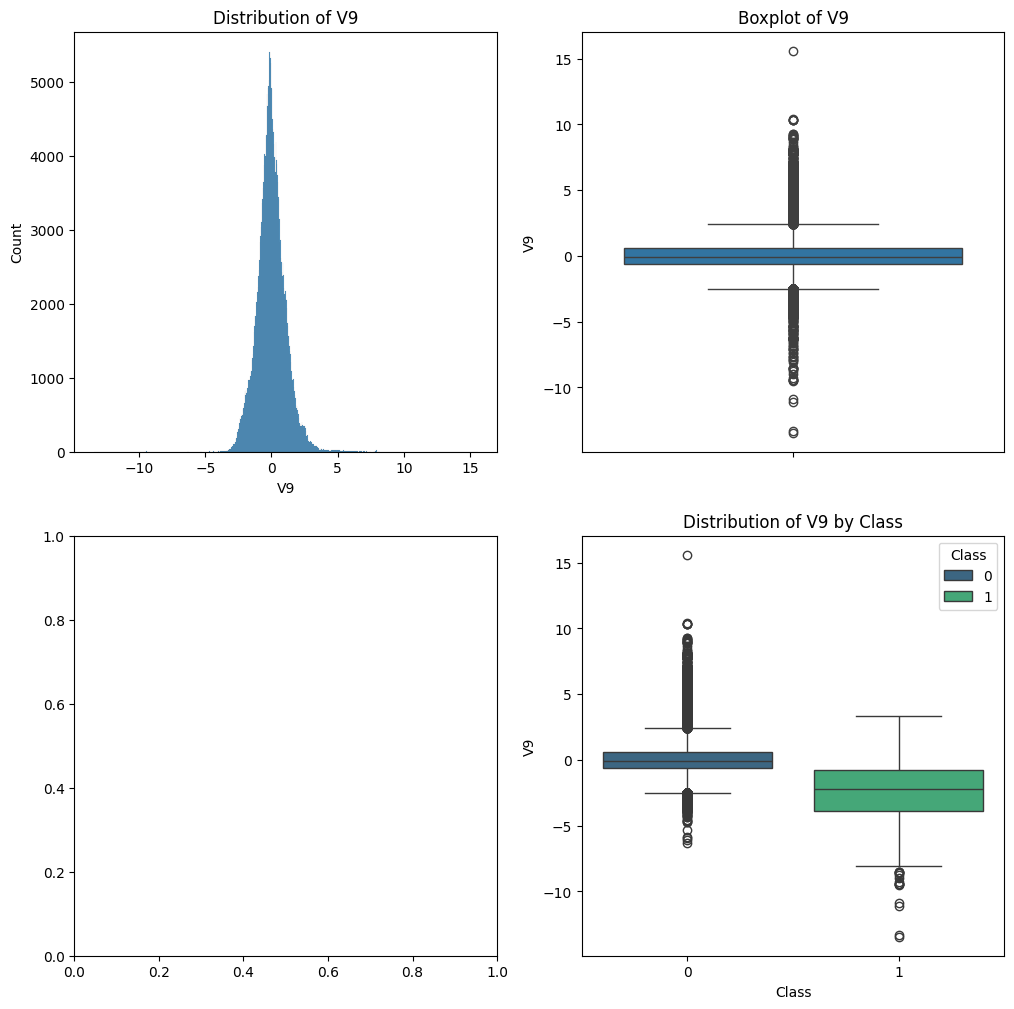

--------------------------
Class                 0           1
V9 count  284315.000000  492.000000
   mean        0.004467   -2.581123
   std         1.089372    2.500896
   min        -6.290730  -13.434066
   25%        -0.640412   -3.872383
   50%        -0.049964   -2.208768
   75%         0.598230   -0.787850
   max        15.594995    3.353525


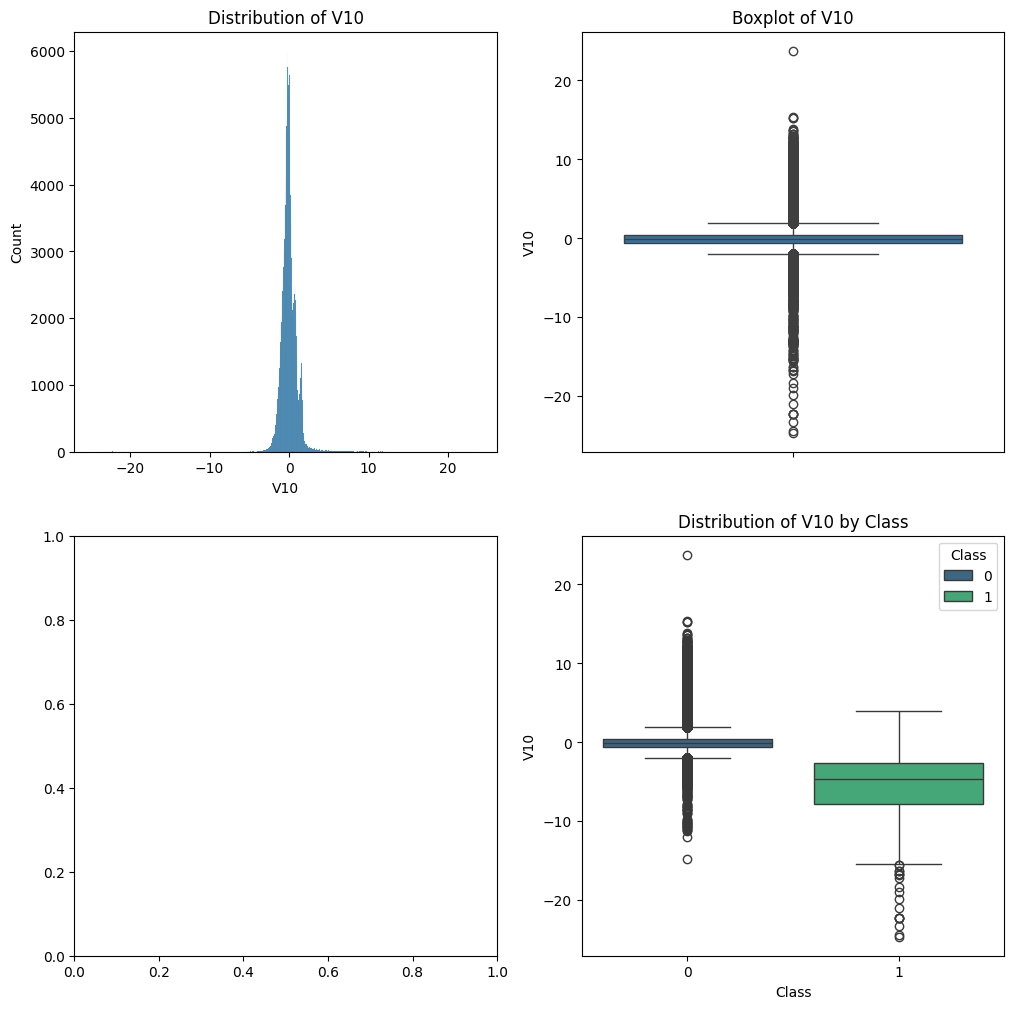

--------------------------
Class                  0           1
V10 count  284315.000000  492.000000
    mean        0.009824   -5.676883
    std         1.044204    4.897341
    min       -14.741096  -24.588262
    25%        -0.532880   -7.756698
    50%        -0.091872   -4.578825
    75%         0.455135   -2.614184
    max        23.745136    4.031435


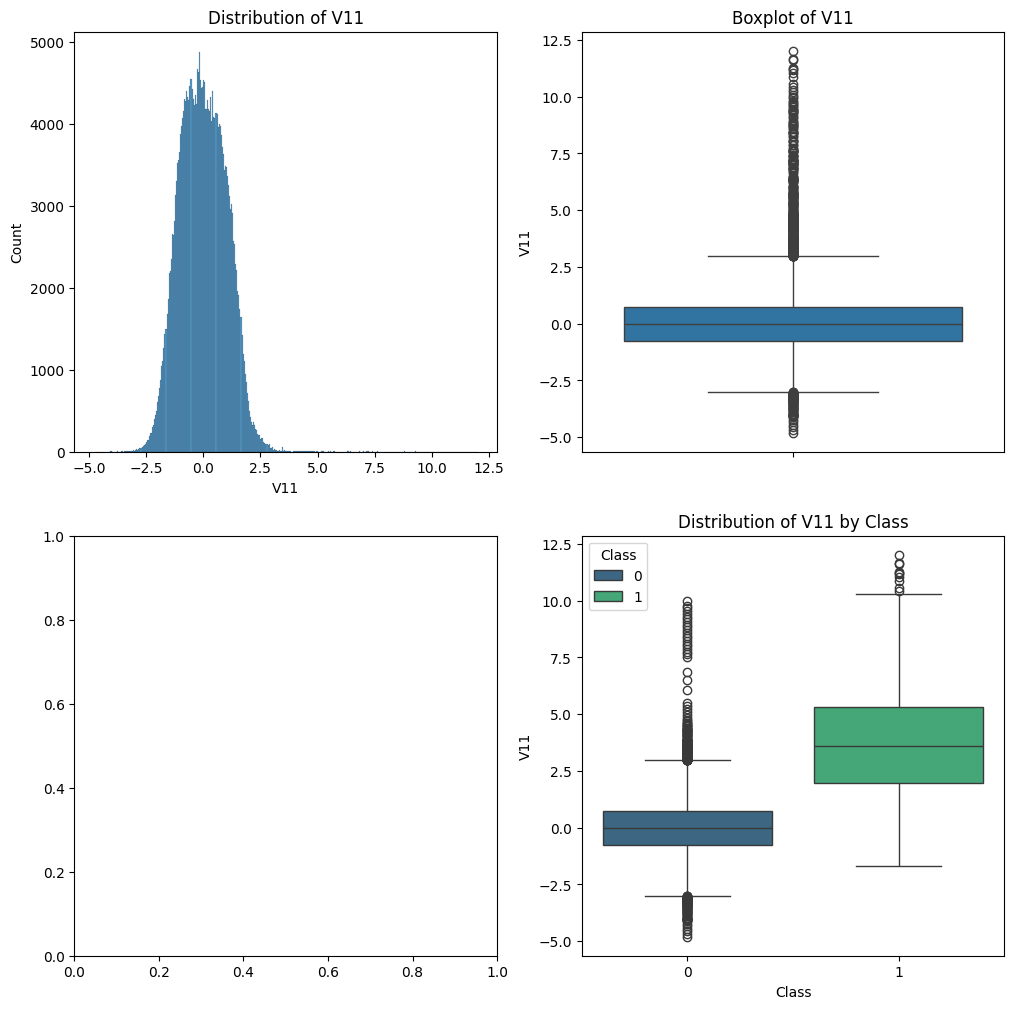

--------------------------
Class                  0           1
V11 count  284315.000000  492.000000
    mean       -0.006576    3.800173
    std         1.003112    2.678605
    min        -4.797473   -1.702228
    25%        -0.763447    1.973397
    50%        -0.034923    3.586218
    75%         0.736362    5.307078
    max        10.002190   12.018913


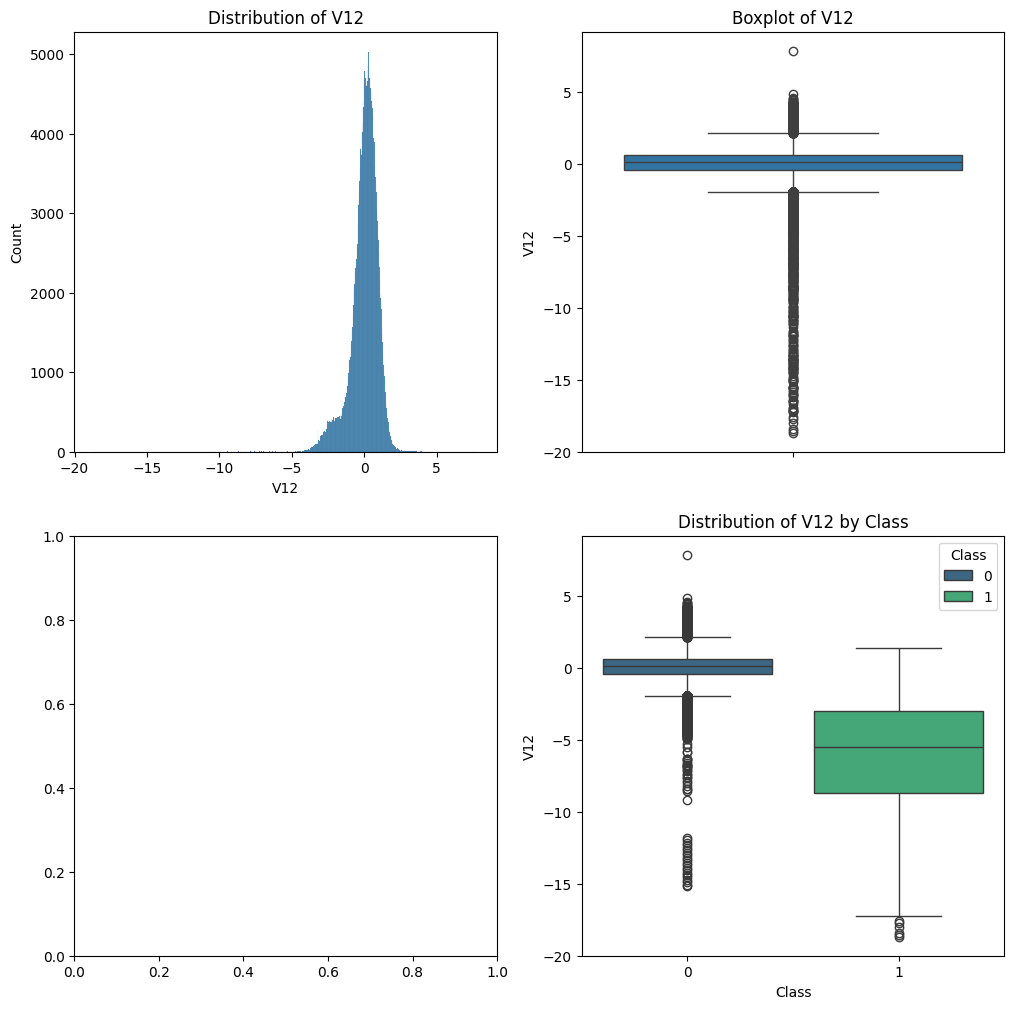

--------------------------
Class                  0           1
V12 count  284315.000000  492.000000
    mean        0.010832   -6.259393
    std         0.945939    4.654458
    min       -15.144988  -18.683715
    25%        -0.402102   -8.688177
    50%         0.141679   -5.502530
    75%         0.619207   -2.974088
    max         7.848392    1.375941


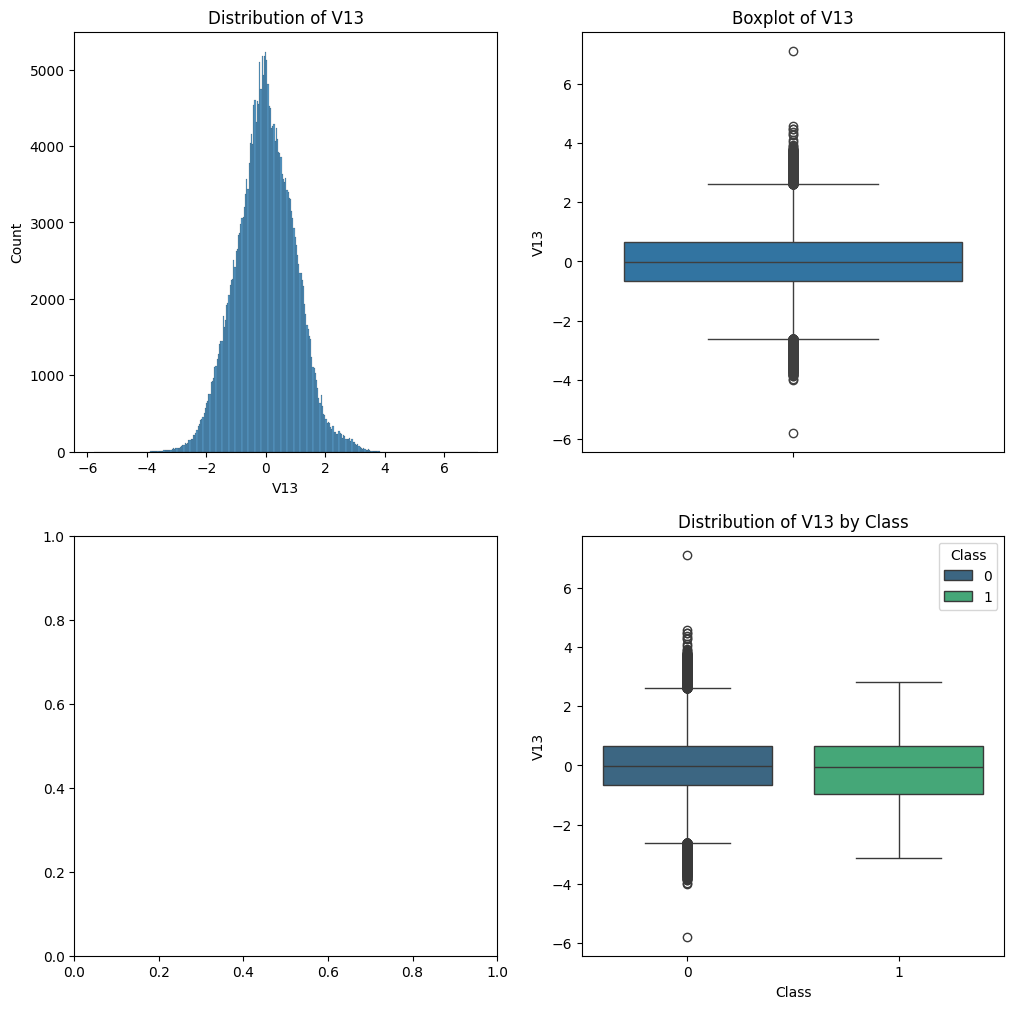

--------------------------
Class                  0           1
V13 count  284315.000000  492.000000
    mean        0.000189   -0.109334
    std         0.995067    1.104518
    min        -5.791881   -3.127795
    25%        -0.648067   -0.979117
    50%        -0.013547   -0.065566
    75%         0.662492    0.672964
    max         7.126883    2.815440


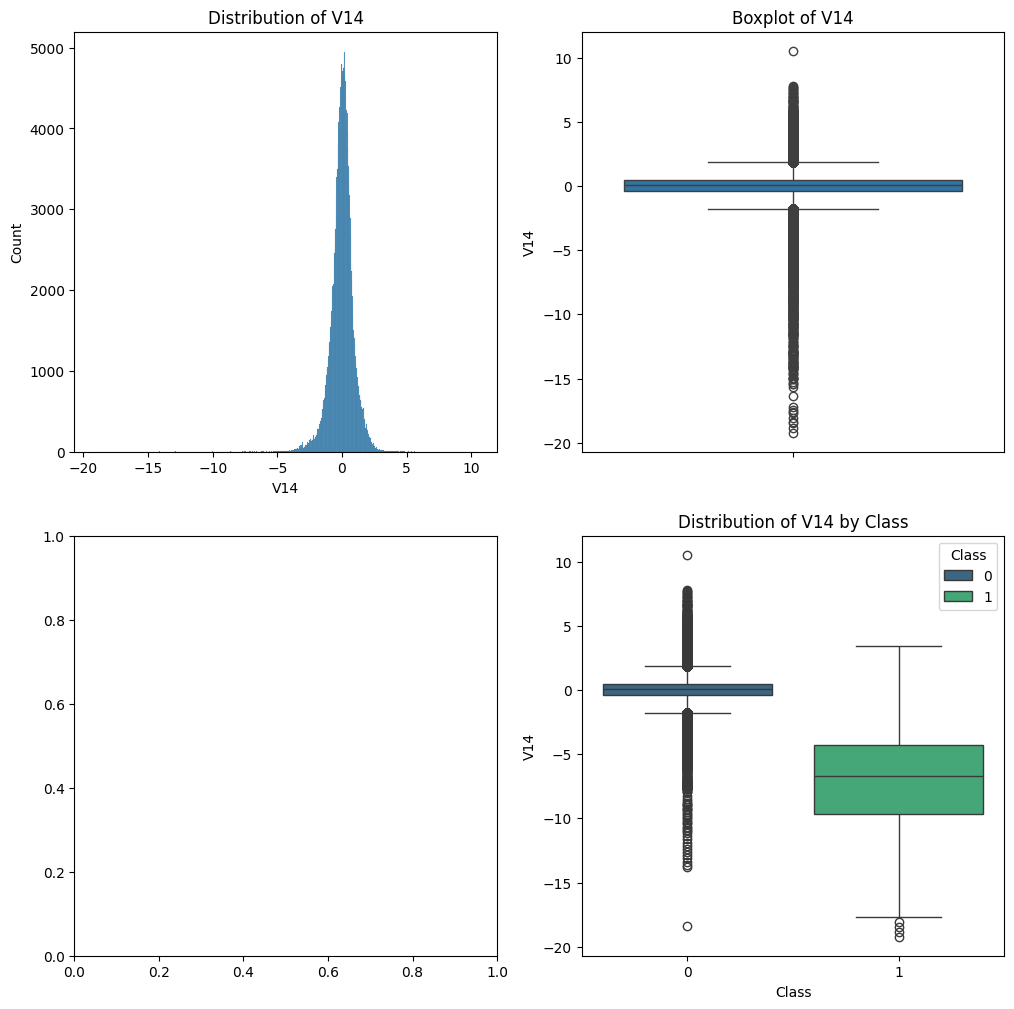

--------------------------
Class                  0           1
V14 count  284315.000000  492.000000
    mean        0.012064   -6.971723
    std         0.897007    4.278940
    min       -18.392091  -19.214325
    25%        -0.422453   -9.692723
    50%         0.051947   -6.729720
    75%         0.494104   -4.282821
    max        10.526766    3.442422


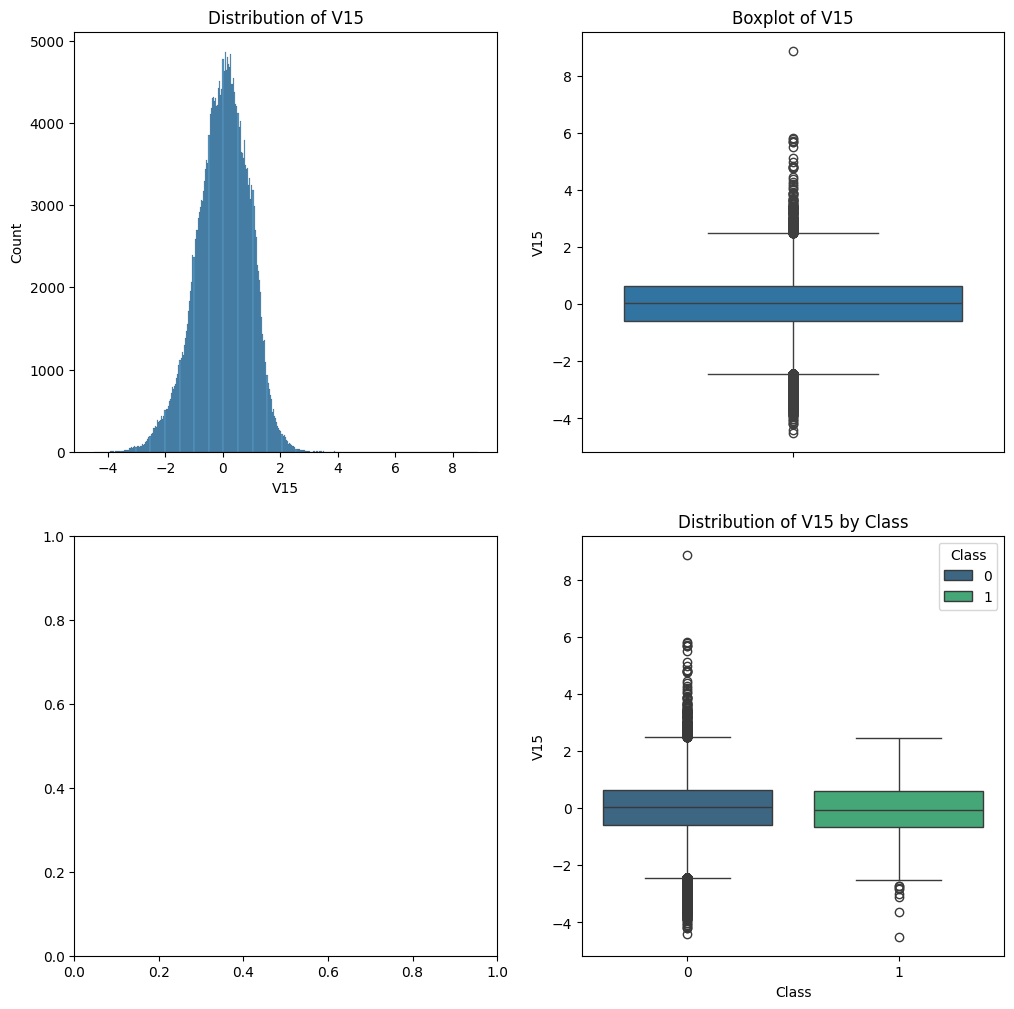

--------------------------
Class                  0           1
V15 count  284315.000000  492.000000
    mean        0.000161   -0.092929
    std         0.915060    1.049915
    min        -4.391307   -4.498945
    25%        -0.582812   -0.643539
    50%         0.048294   -0.057227
    75%         0.648842    0.609189
    max         8.877742    2.471358


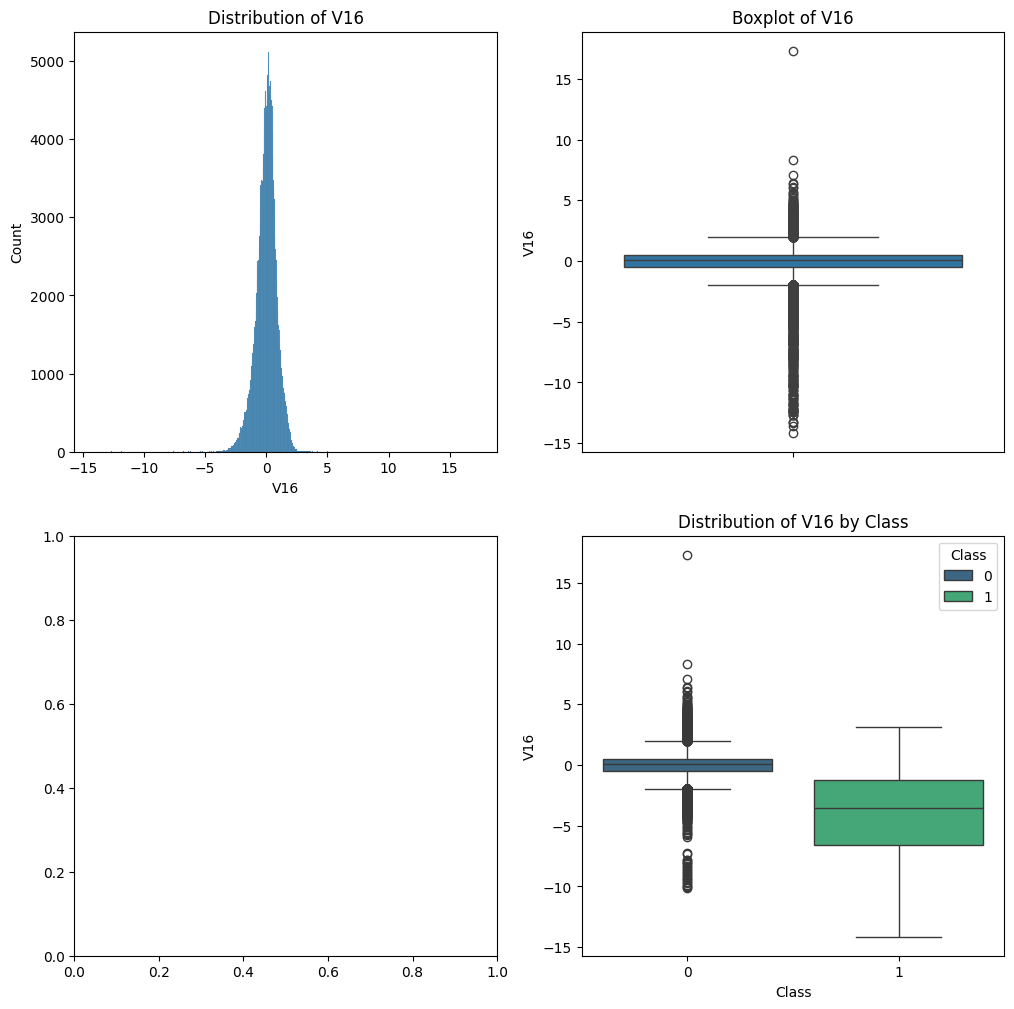

--------------------------
Class                  0           1
V16 count  284315.000000  492.000000
    mean        0.007164   -4.139946
    std         0.844772    3.865035
    min       -10.115560  -14.129855
    25%        -0.465543   -6.562915
    50%         0.067377   -3.549795
    75%         0.523738   -1.226043
    max        17.315112    3.139656


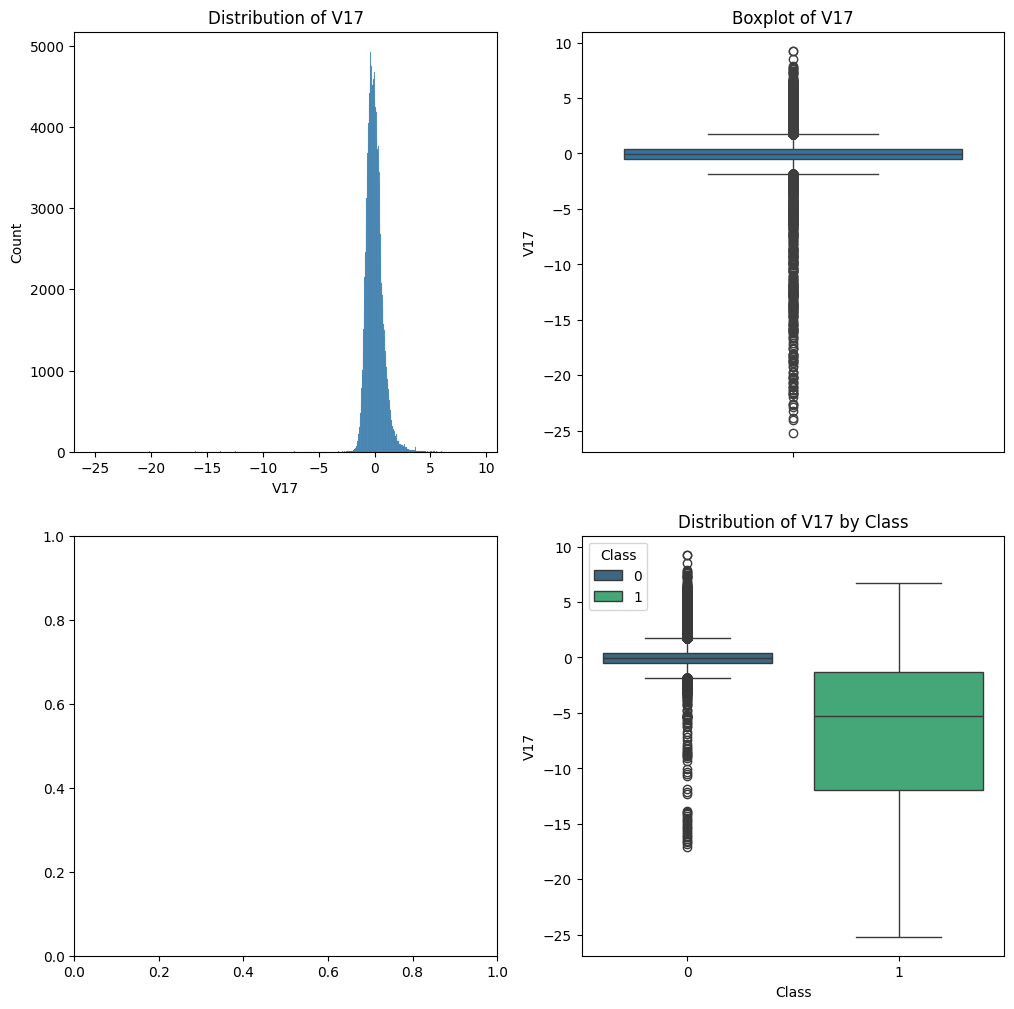

--------------------------
Class                  0           1
V17 count  284315.000000  492.000000
    mean        0.011535   -6.665836
    std         0.749457    6.970618
    min       -17.098444  -25.162799
    25%        -0.482644  -11.945057
    50%        -0.064833   -5.302949
    75%         0.399922   -1.341940
    max         9.253526    6.739384


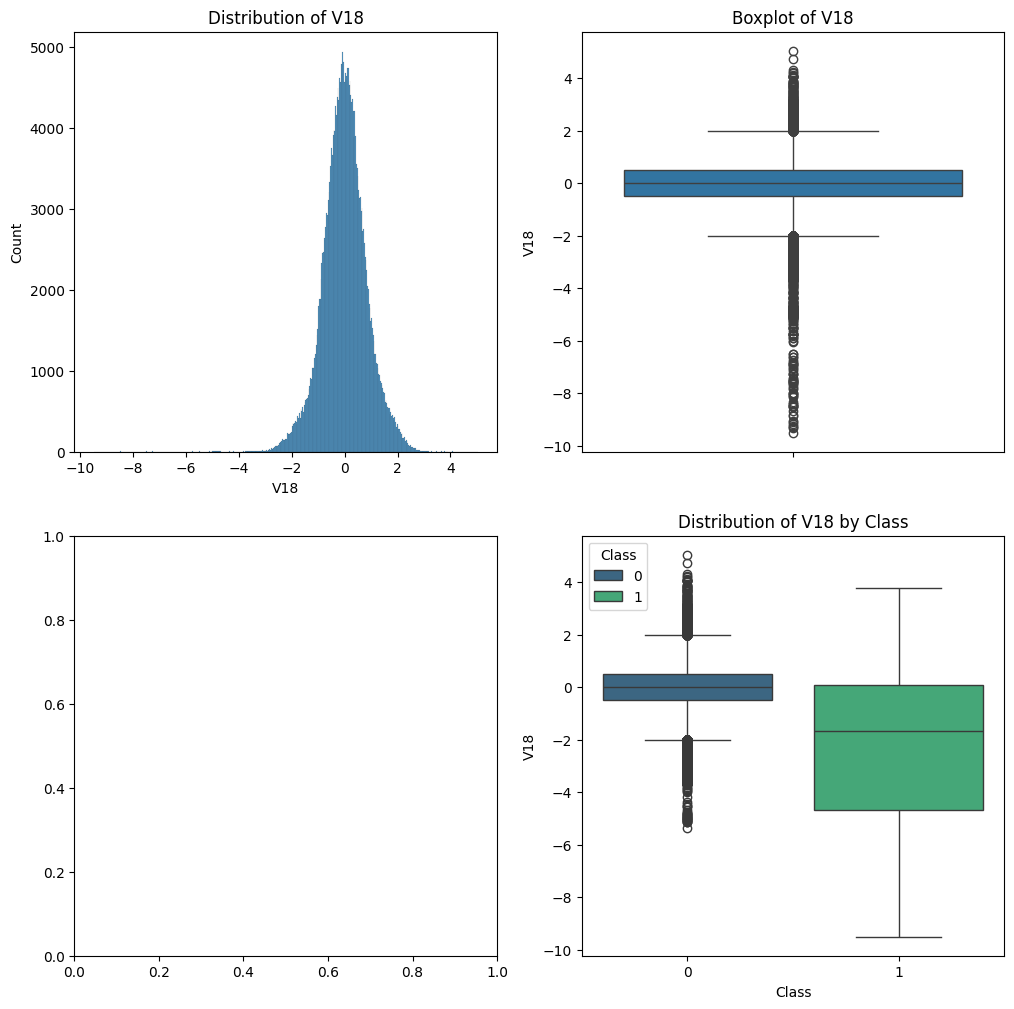

--------------------------
Class                  0           1
V18 count  284315.000000  492.000000
    mean        0.003887   -2.246308
    std         0.824919    2.899366
    min        -5.366660   -9.498746
    25%        -0.497414   -4.664576
    50%        -0.002787   -1.664346
    75%         0.501103    0.091772
    max         5.041069    3.790316


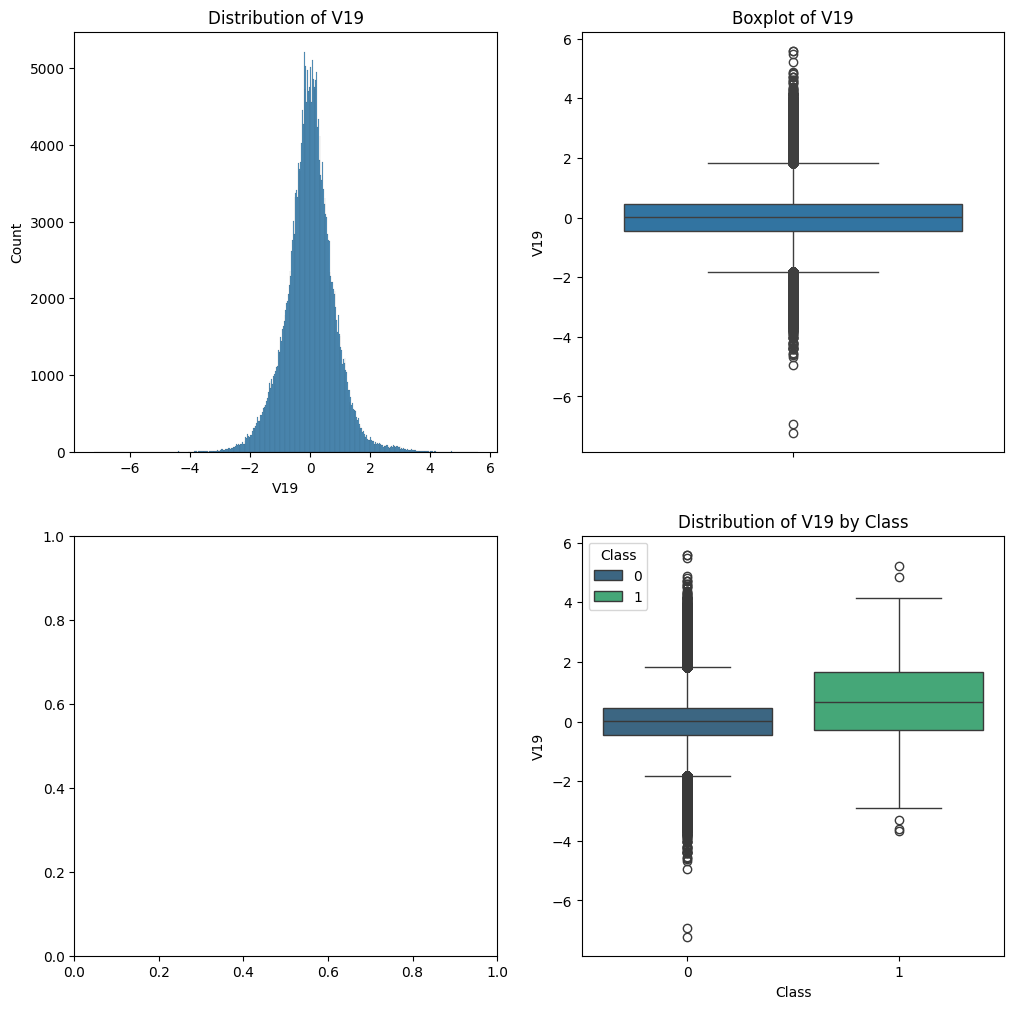

--------------------------
Class                  0           1
V19 count  284315.000000  492.000000
    mean       -0.001178    0.680659
    std         0.811733    1.539853
    min        -7.213527   -3.681904
    25%        -0.456366   -0.299423
    50%         0.003117    0.646807
    75%         0.457499    1.649318
    max         5.591971    5.228342


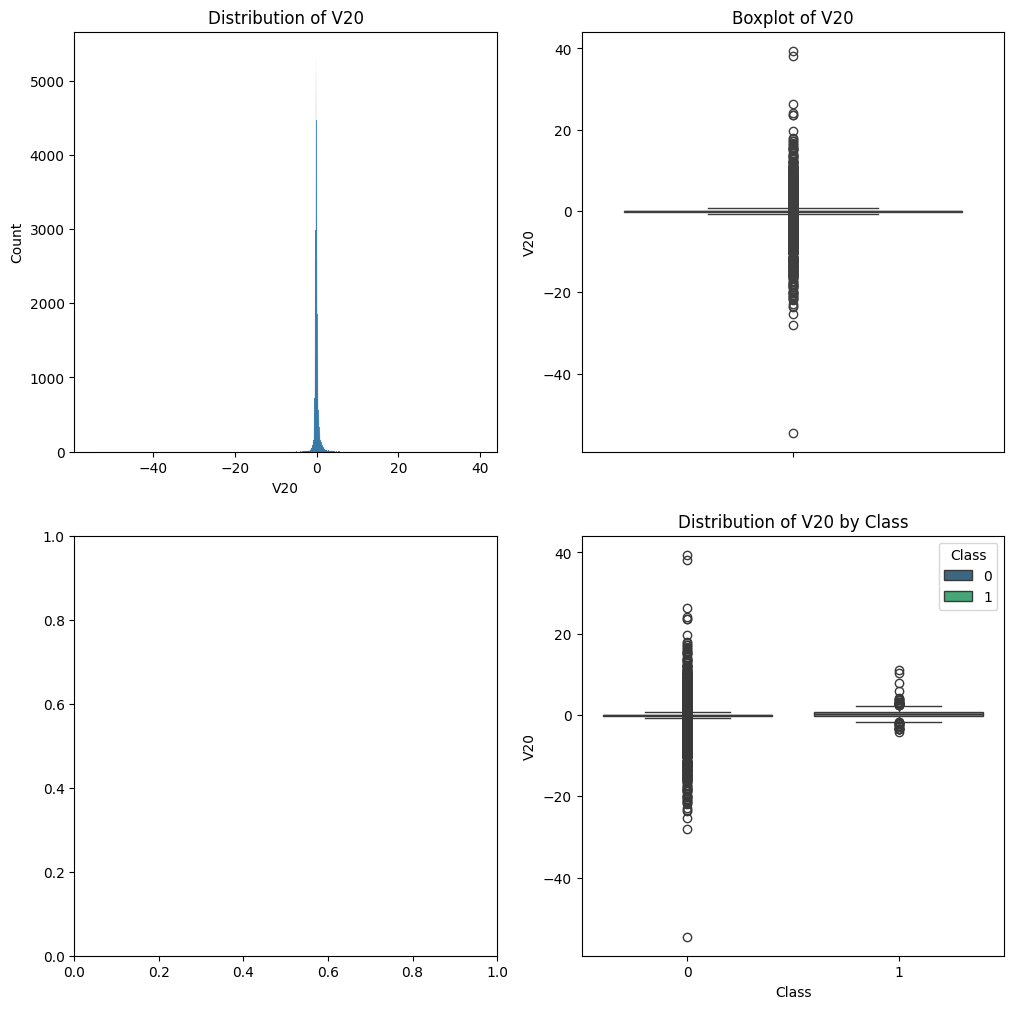

--------------------------
Class                  0           1
V20 count  284315.000000  492.000000
    mean       -0.000644    0.372319
    std         0.769404    1.346635
    min       -54.497720   -4.128186
    25%        -0.211764   -0.171760
    50%        -0.062646    0.284693
    75%         0.132401    0.822445
    max        39.420904   11.059004


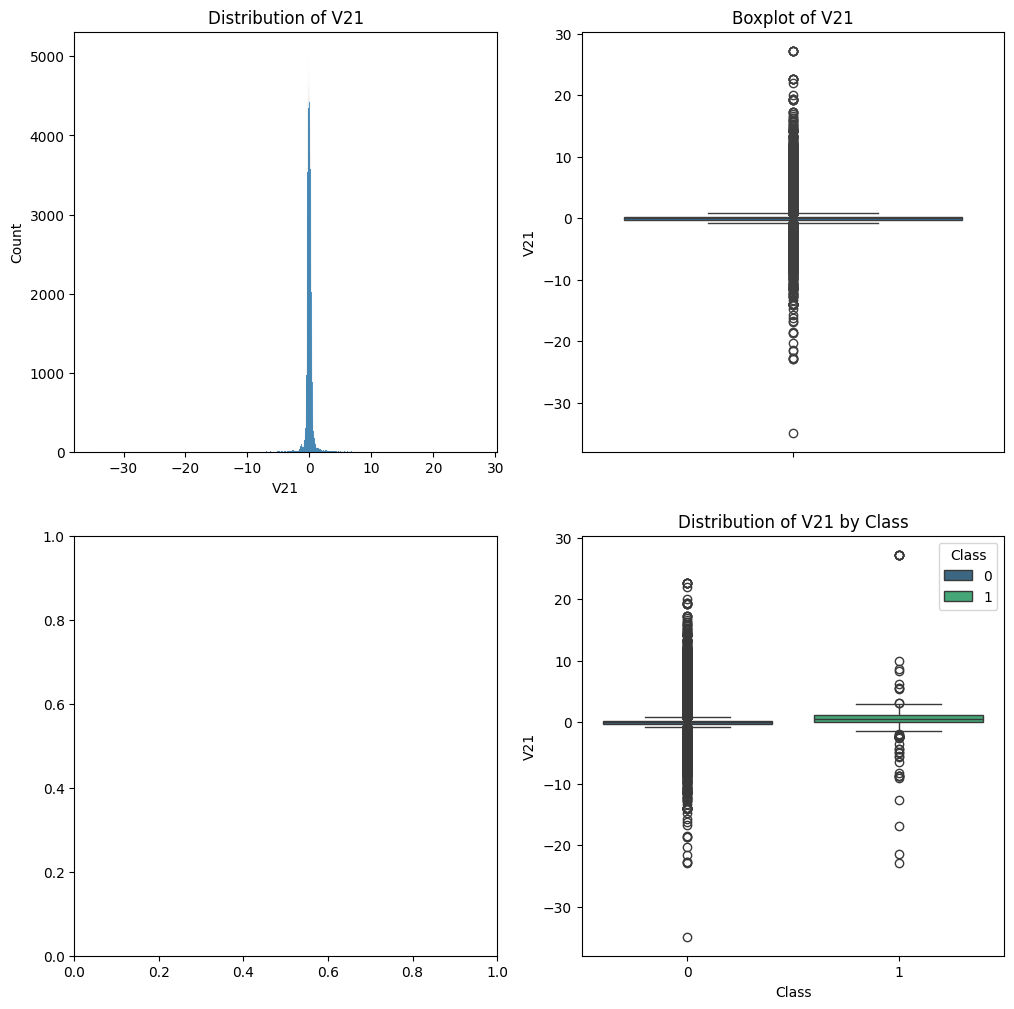

--------------------------
Class                  0           1
V21 count  284315.000000  492.000000
    mean       -0.001235    0.713588
    std         0.716743    3.869304
    min       -34.830382  -22.797604
    25%        -0.228509    0.041787
    50%        -0.029821    0.592146
    75%         0.185626    1.244611
    max        22.614889   27.202839


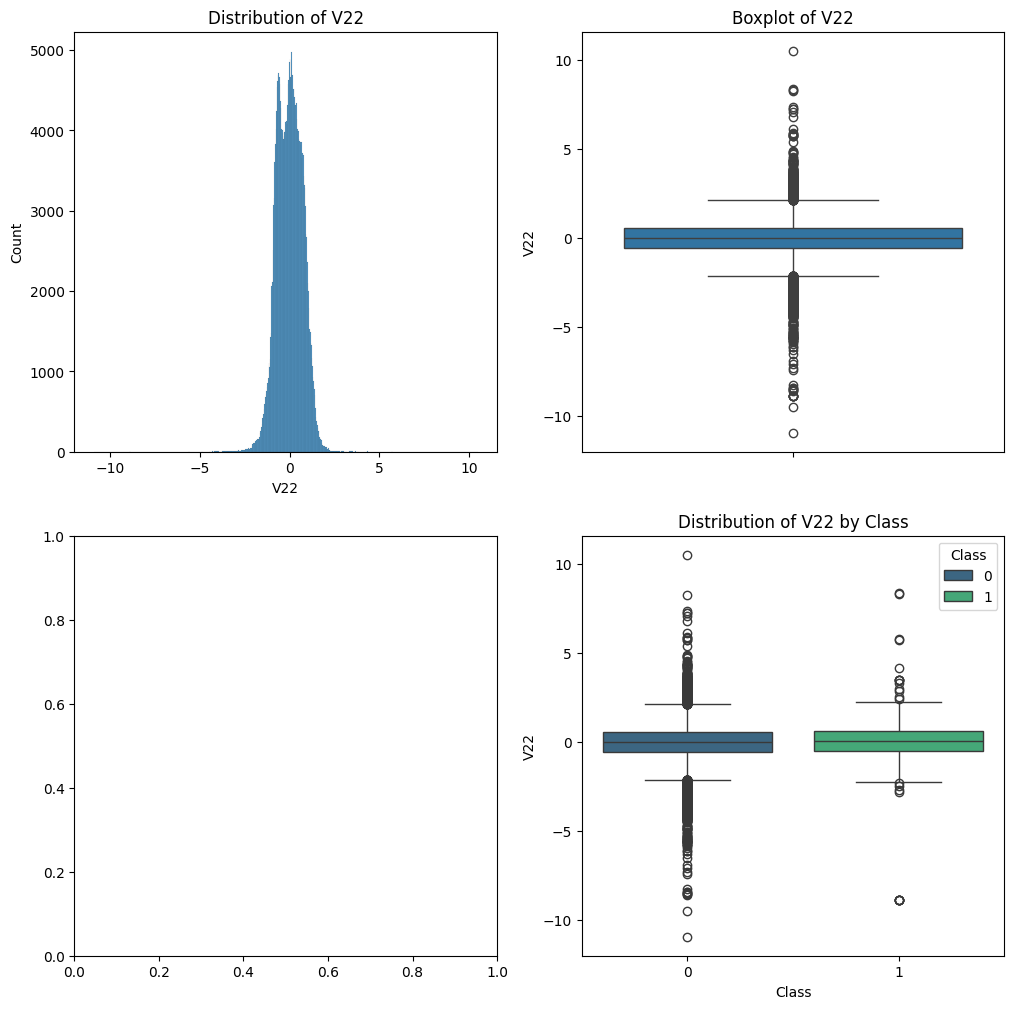

--------------------------
Class                  0           1
V22 count  284315.000000  492.000000
    mean       -0.000024    0.014049
    std         0.723668    1.494602
    min       -10.933144   -8.887017
    25%        -0.542403   -0.533764
    50%         0.006736    0.048434
    75%         0.528407    0.617474
    max        10.503090    8.361985


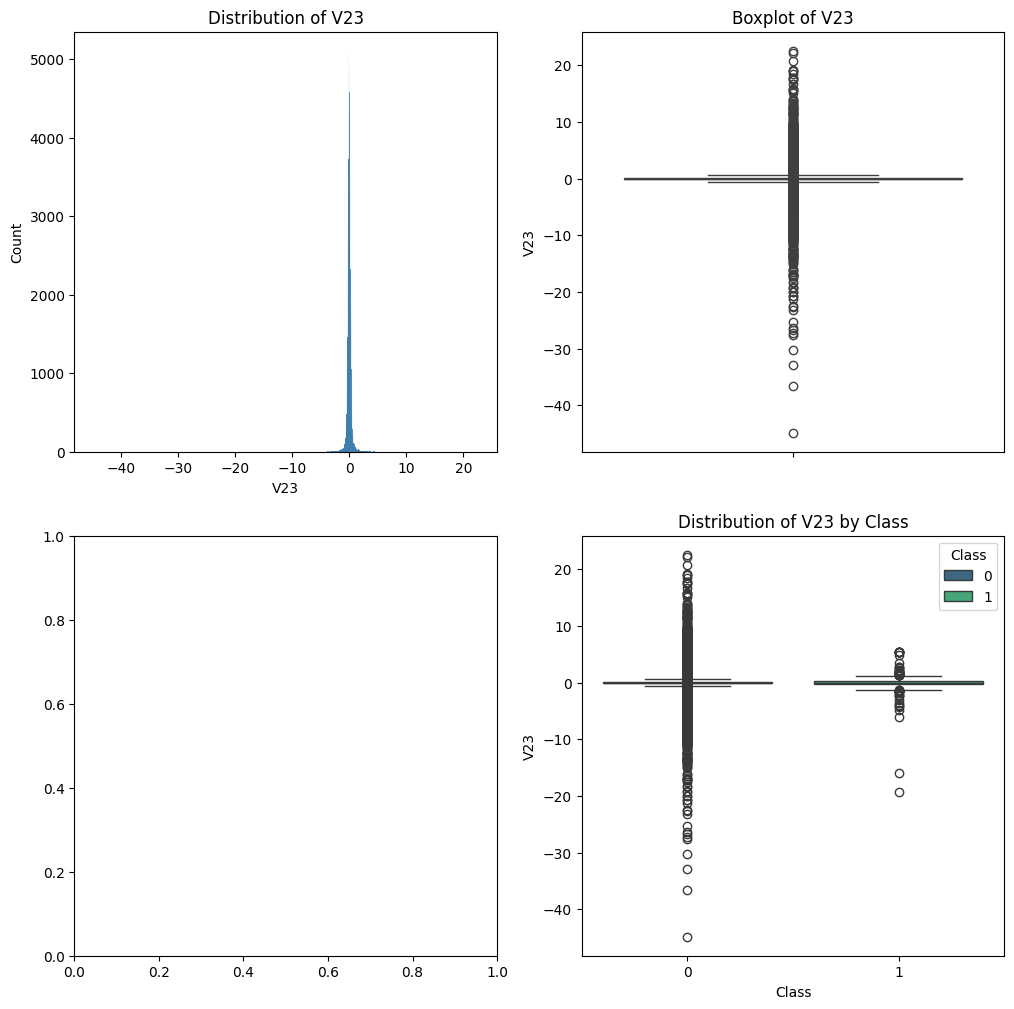

--------------------------
Class                  0           1
V23 count  284315.000000  492.000000
    mean        0.000070   -0.040308
    std         0.621541    1.579642
    min       -44.807735  -19.254328
    25%        -0.161702   -0.342175
    50%        -0.011147   -0.073135
    75%         0.147522    0.308378
    max        22.528412    5.466230


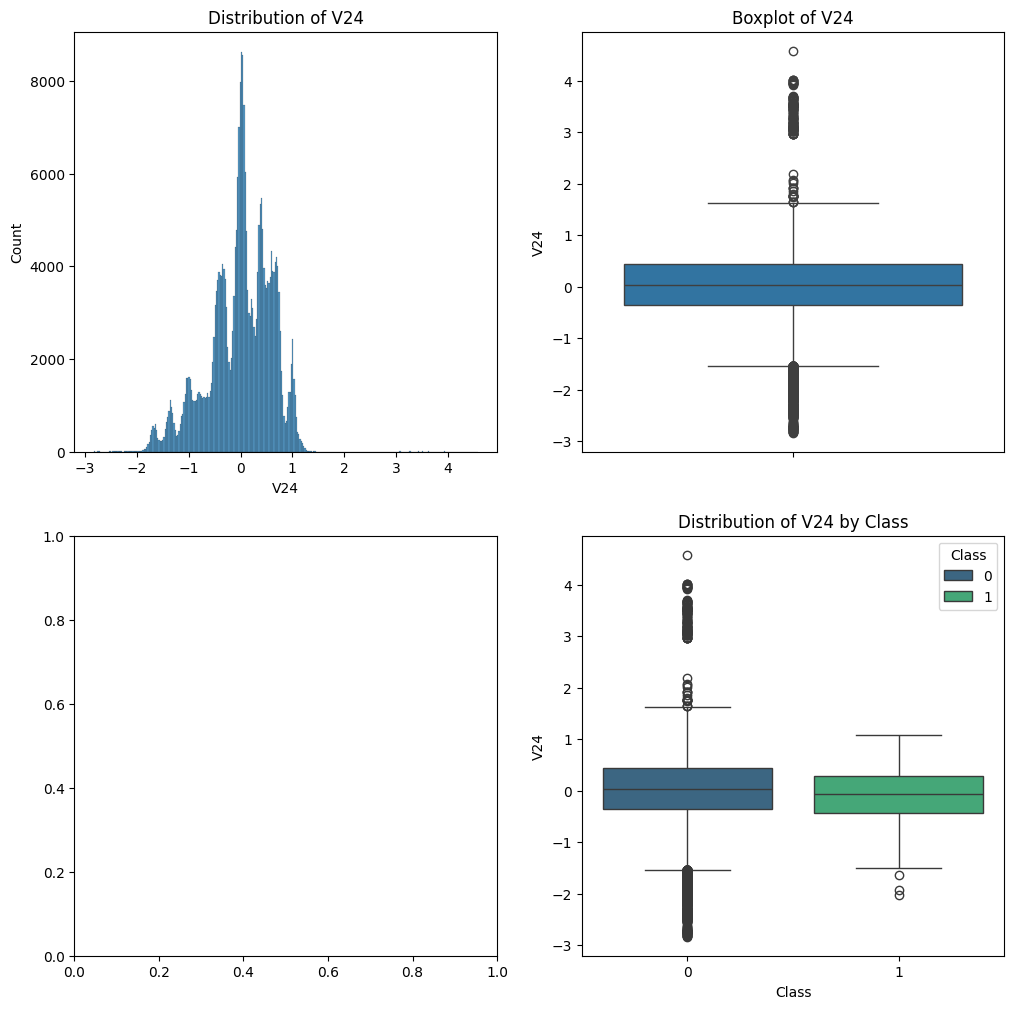

--------------------------
Class                  0           1
V24 count  284315.000000  492.000000
    mean        0.000182   -0.105130
    std         0.605776    0.515577
    min        -2.836627   -2.028024
    25%        -0.354425   -0.436809
    50%         0.041082   -0.060795
    75%         0.439869    0.285328
    max         4.584549    1.091435


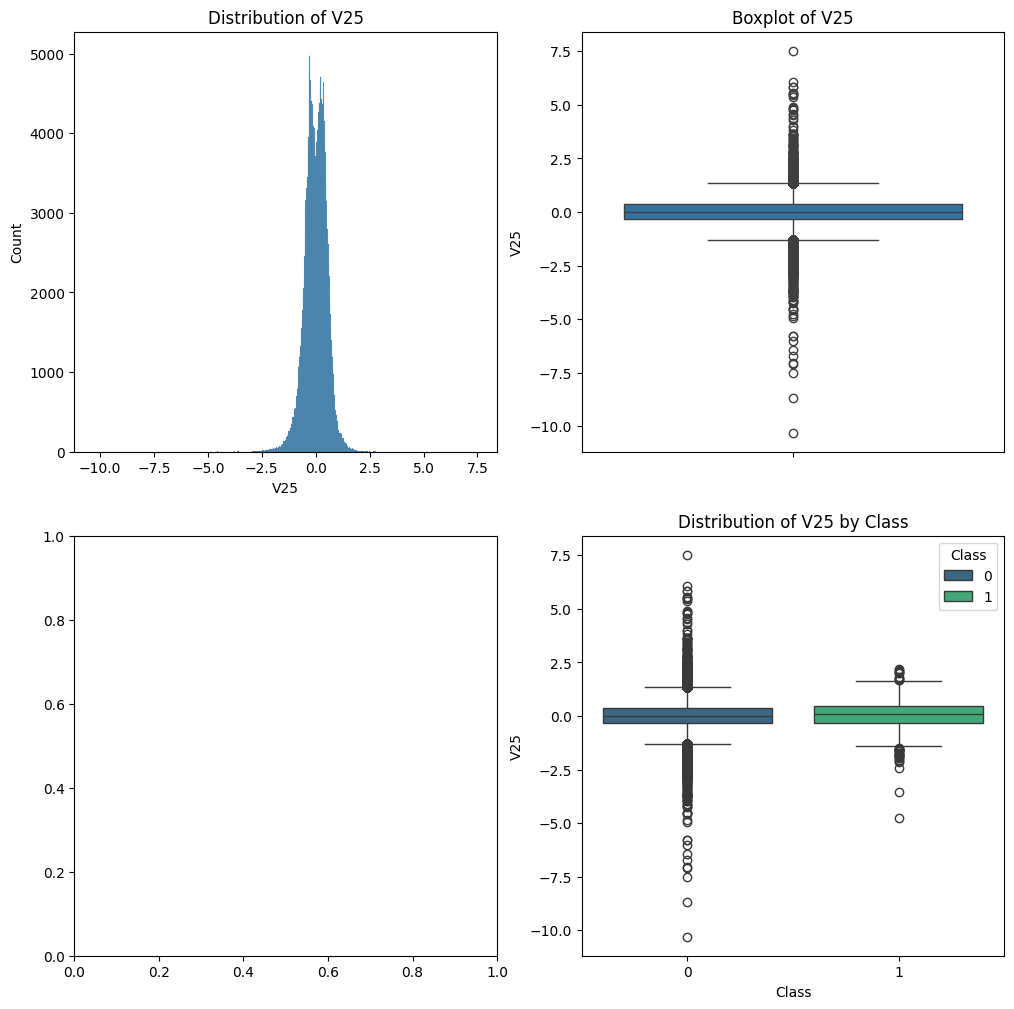

--------------------------
Class                  0           1
V25 count  284315.000000  492.000000
    mean       -0.000072    0.041449
    std         0.520673    0.797205
    min       -10.295397   -4.781606
    25%        -0.317145   -0.314348
    50%         0.016417    0.088371
    75%         0.350594    0.456515
    max         7.519589    2.208209


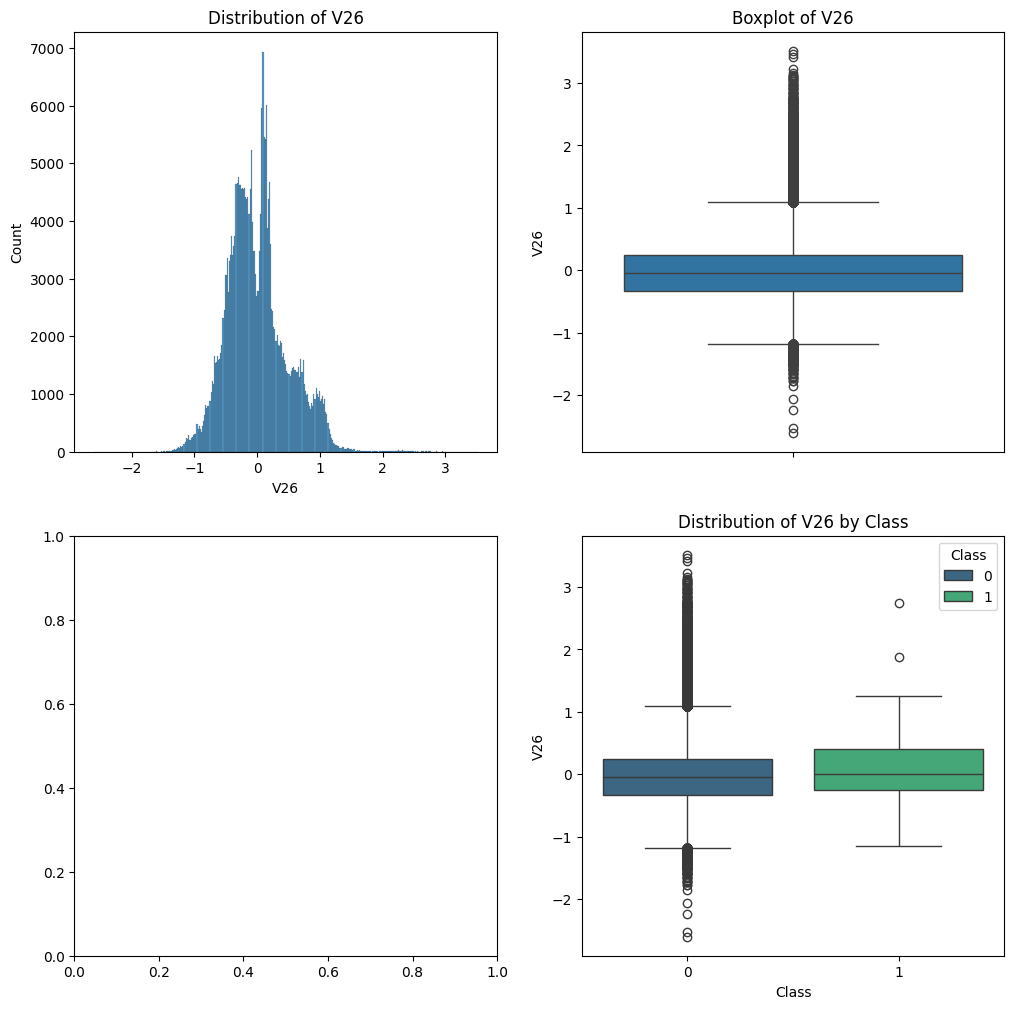

--------------------------
Class                  0           1
V26 count  284315.000000  492.000000
    mean       -0.000089    0.051648
    std         0.482241    0.471679
    min        -2.604551   -1.152671
    25%        -0.327074   -0.259416
    50%        -0.052227    0.004321
    75%         0.240671    0.396733
    max         3.517346    2.745261


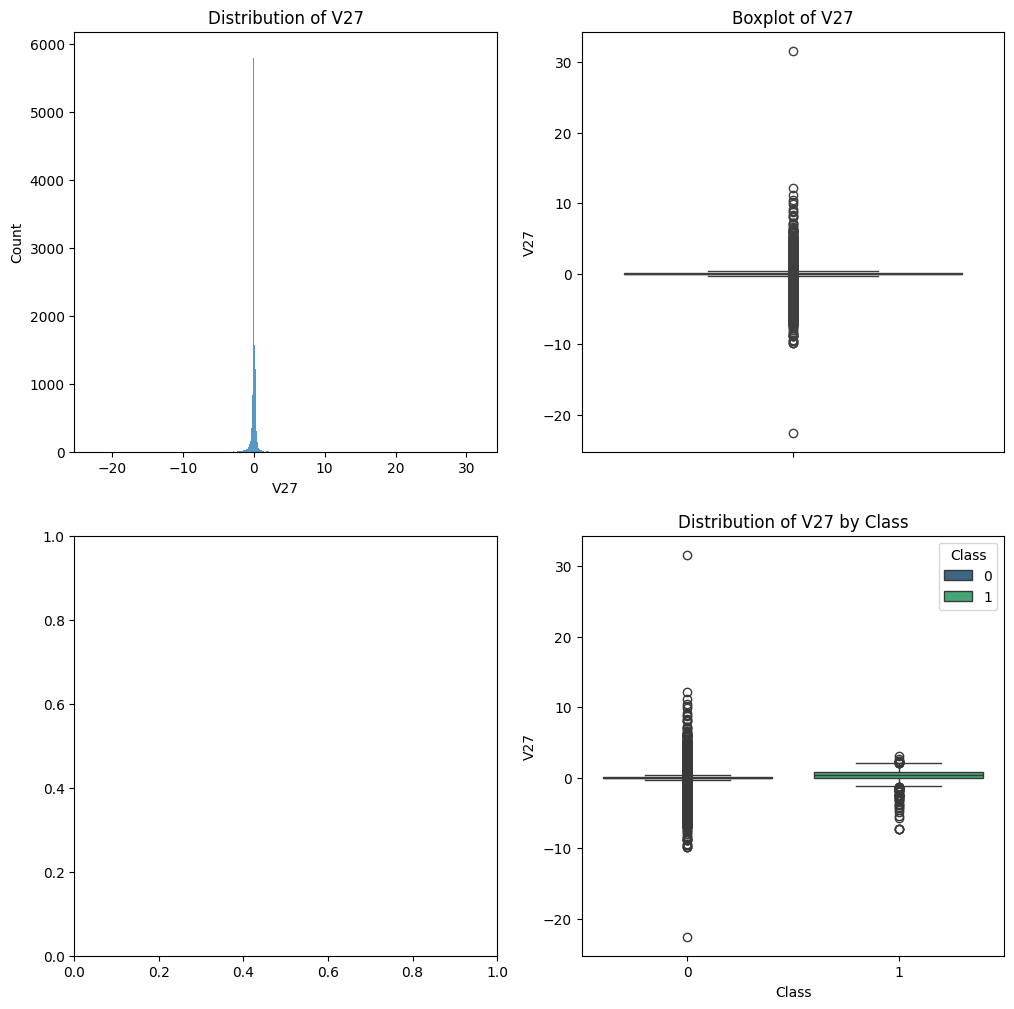

--------------------------
Class                  0           1
V27 count  284315.000000  492.000000
    mean       -0.000295    0.170575
    std         0.399847    1.376766
    min       -22.565679   -7.263482
    25%        -0.070852   -0.020025
    50%         0.001230    0.394926
    75%         0.090573    0.826029
    max        31.612198    3.052358


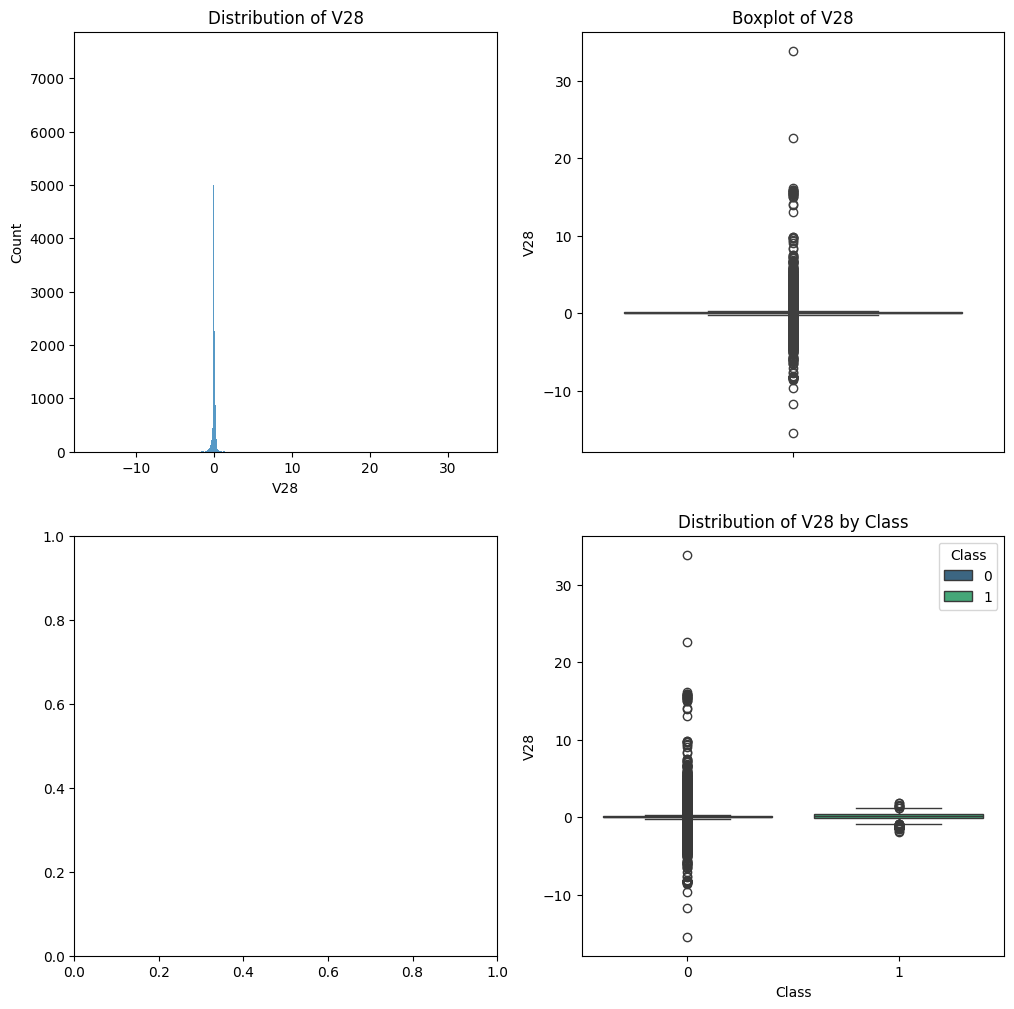

--------------------------
Class                  0           1
V28 count  284315.000000  492.000000
    mean       -0.000131    0.075667
    std         0.329570    0.547291
    min       -15.430084   -1.869290
    25%        -0.052950   -0.108868
    50%         0.011199    0.146344
    75%         0.077962    0.381152
    max        33.847808    1.779364


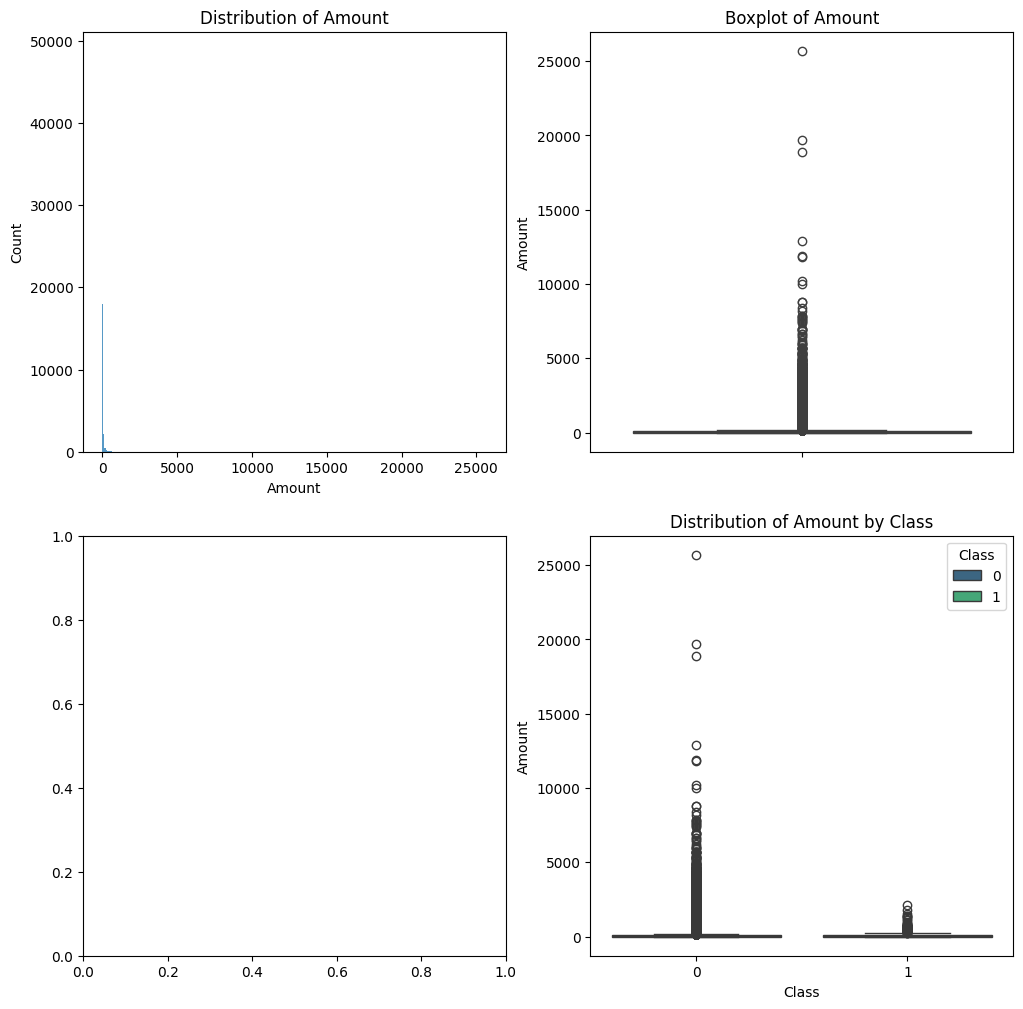

--------------------------
Class                     0            1
Amount count  284315.000000   492.000000
       mean       88.291022   122.211321
       std       250.105092   256.683288
       min         0.000000     0.000000
       25%         5.650000     1.000000
       50%        22.000000     9.250000
       75%        77.050000   105.890000
       max     25691.160000  2125.870000


In [6]:
for i in list(df.columns)[:-1]:
   plotVars(var=i, target="Class", df=df)

Almost all features has normal form

# Pre-processing 


In [48]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


# Split on train and Validation

In [71]:
df_train = df.sample(frac=0.7, random_state=42)
df_train.to_csv("data/train.csv", index=False, sep="|")


df_validation = df.drop(df_train.index)
df_validation.to_csv("data/validation.csv", index=False, sep="|")

In [65]:
df_train[["Class","V1"]].groupby(["Class"]).count()

,V1
Class,
0,199031
1,334


In [66]:
df_validation[["Class","V1"]].groupby(["Class"]).count()

,V1
Class,
0,85284
1,158


In [68]:
(158/(85284 + 158))*100

0.18492076496336696

In [69]:
(334/(199031 + 334))*100

0.16753191382639882

In [73]:
X = df_train.loc[:, df_train.columns != 'Class']
y = list(df_train["Class"])

In [76]:
X_smote, y_smote = SMOTE(random_state=42, sampling_strategy=.15).fit_resample(X, y)
df_smote = pd.DataFrame(X_smote)
df_smote["Y"] = y_smote

In [78]:
df_smote[["V1", "Y"]].groupby(["Y"]).count()

,V1
Y,
0,199031
1,29854


In [82]:
############### LR
logistcRegresion_params = {'C': [0.01,0.1,1,10,100,1000]}

############### DT

decisionTree_params = {"criterion":["gini","entropy"],
                       "max_depth":[5,10]    
                      }

############### RF
randomForest_params = {
    'max_depth': [5,10],
    "criterion":["gini","entropy"],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [30,70],
    'n_jobs':[-1]
    
}

############### XGB
xgb_params =    {
            'n_estimators': [30,70],
            "criterion":["gini","entropy"],
            'max_depth':[5,10],
            'learning_rate': [0.1,1.0],
            'verbosity':[0],
            'n_jobs':[-1],
            #'tree_method':["gpu_hist"]
            'gamma': [0,1],
            #'min_child_weight': [0, 0.5, 1],
            #'max_delta_step': [0],
            #'subsample': [0.7, 0.8, 0.9, 1],
            #'colsample_bytree': [0.6, 0.8, 1],
            #'colsample_bylevel': [1],
            #'reg_alpha': [0, 1e-2, 1, 1e1],
            #'reg_lambda': [0, 1e-2, 1, 1e1],
            #'base_score': [0.5]
            }

logistcRegresion = LogisticRegression()
decisionTree = DecisionTreeClassifier()
randomForest = RandomForestClassifier()
xgb = XGBClassifier()


models = [
          logistcRegresion, 
          decisionTree,
          randomForest, 
          xgb
          ]
params = [
          logistcRegresion_params, 
          decisionTree_params, 
          randomForest_params, 
          xgb_params
         ]

modelname = [
             "LogisticRegresion", 
             "DecisionTree", 
             "RandomForest", 
             "XGB", 
             "AdaBoost"
             ]

In [ ]:
macroResults = []
contador = 0

startTime = time.time()
for model,param, modelN in zip(models, params, modelname):
    print("Model: {}, \n Params: {},\n Dataset: {}\n".format(modelN, param, data[i][0]))
        
    model_GS = GridSearchCV(estimator=model,
                             param_grid=param, 
                             scoring = ['accuracy', 'f1','balanced_accuracy','roc_auc'],
                             n_jobs=-1,
                             cv=5,
                             verbose=False,
                             refit='f1'
                            )
    model_GS.fit(X,y)
    estimator = model_GS.best_estimator_
    dump(estimator, str("models/" + modelN + "_" +  ".joblib"))
        
    results = pd.DataFrame(model_GS.cv_results_)
    results["Model"] = str(model)
    results["Grid_Time"] = round(time.time() - startTime,4)
        
    results = results[["mean_fit_time", 
                           "params", 
                           "mean_test_accuracy","std_test_accuracy",
                           "mean_test_f1","std_test_f1",
                           "mean_test_balanced_accuracy","std_test_balanced_accuracy",
                           "mean_test_roc_auc","std_test_roc_auc",
                           "Model","Dataset"
                          ]]
        
    nameFile = "results/"+str(modelN).replace("()","") +"_"+ str(data[i][0]).replace("%","").replace(" ","_")+str(i)+".csv"
        
        results.to_csv(nameFile, sep="|", index=False)
        macroResults.append(results)
        print("Tiempo de ejecución del bloque: {}".format(round(time.time() - startTime,4)))
        print("-------------------------------------------------------------------", contador)
        contador += 1